In [112]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from array import array
import matplotlib.pyplot as plt
import numpy as np

In [113]:
#function to create dataframe for the different files created
def create_dataframe(name):
    filename = name
    with open(filename) as f:
        data = f.read()
    #splitting every row with a new line
    data = data.split('\n') 
    col = [data[i] for i in range(0,len(data))]
    df_temp = pd.DataFrame({'Calls': col})
    #splitting columns on the basis of ','
    df = df_temp['Calls'].str.split(',').apply(pd.Series)
    #using only the first 10 PEs for visualizations and comparisons
    df = df[:10]
    return(df)

In [114]:
#benign dataframe
benign_df = create_dataframe('benign')
print (benign_df)

  0     1     2     3     4     5     6     7     8     9      ... 22751  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
2   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
5   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
6   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
7   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
8   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
9   1.0   1.0   1.0   1.0   0.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   

  22752 22753 22754 22755 22756 22757 22758 22759 22760  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0

In [149]:
malicious_df = create_dataframe('malicious-before')
print(malicious_df)

  0     1     2     3     4     5     6     7     8     9      ... 22751  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
2   1.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   1.0   1.0  ...   0.0   
3   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
4   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0  ...   0.0   
5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
6   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
7   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0  ...   0.0   
8   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
9   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   

  22752 22753 22754 22755 22756 22757 22758 22759 22760  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0

In [150]:
adverserial_df = create_dataframe('adverserial')
print(adverserial_df)

  0     1     2     3     4     5     6     7     8     9      ... 22751  \
0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0  ...   0.0   
1   0.0   1.0   0.0   0.0   1.0   0.0   0.0   1.0   1.0   0.0  ...   0.0   
2   1.0   0.0   1.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
3   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   1.0   0.0  ...   0.0   
4   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0  ...   0.0   
5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
6   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
7   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0  ...   0.0   
8   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
9   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   

  22752 22753 22754 22755 22756 22757 22758 22759 22760  
0   1.0   0.0   0.0   1.0   1.0   0.0   0.0   1.0   1.0  
1   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0

In [117]:
#method to compare the different PEs by computing the cosine similarity

def calculate_cosine_similarity(df1, df2):
    similar_counts =[]
    unsimilar_counts=[]
    

    for col in range(0, len(df1.columns)):
        count_similar = 0
        count_not_similar = 0
        
        #converting the values of array to integer to calculate cosine similarity
        array1 = df1[col]        
        for i in range(0, len(array1)): 
            array1[i] = int(eval(array1[i]))
        
        array2 = df2[col]        
        for j in range(0, len(array2)): 
            array2[j] = int(eval(array2[j]))
        
        #calculating cosine_similarity
        similarity = cosine_similarity(array1.values.reshape(-1,1), array2.values.reshape(-1,1))
        for k in range (len(similarity)):
            for l in range (len(similarity)):
                if(k==l and similarity[k][l]==1):
                    count_similar = count_similar + 1
                elif(k==l and similarity[k][l]==0):
                    count_not_similar = count_not_similar+1
        similar_counts.append(count_similar)
        unsimilar_counts.append(count_not_similar)
    return(similar_counts, unsimilar_counts)

In [151]:
#cosine similarity comparison between malicious before and adverserial data
similar_counts, unsimilar_counts = calculate_cosine_similarity(malicious_df, adverserial_df)

In [118]:
#method 2 to compare every two bit pair
def compute_similarity (df1, df2):
    unsimilar_bits = []
    similar_bits =[]
    for a in range(len(df1)):
        similar_count = 0
        unsimilar_count = 0
        for b in range (len(df1.columns)):       
            if df1.iloc[a][b] == df2.iloc[a][b]:
                similar_count = similar_count+1
            elif df1.iloc[a][b] != df2.iloc[a][b]:
                unsimilar_count = unsimilar_count +1
        similar_bits.append(similar_count)
        unsimilar_bits.append(unsimilar_count)
        
    return(similar_bits , unsimilar_bits)

In [126]:
  def visualization(list1, list2):
    lst_pe = ['PE1', 'PE2','PE3','PE4','PE5','PE6','PE7','PE8','PE9','PE10']
    
    #plotting only similar bits
    plt.bar(lst_pe, list1)
    plt.show()
    
    #plotting only unsimilar bits
    plt.bar(lst_pe, list2)
    plt.show()
    
    #plotting the comparison
    N = 10
    ind = np.arange(N) 
    width = 0.35       
    plt.bar(ind, list1, width, label='Similar Bits')
    plt.bar(ind + width, list2, width,label='Unsimilar Bits')

    plt.ylabel('Number of Bits per PE')
    plt.title('Comparison between PEs')

    plt.xticks(ind + width / 2, ('PE1', 'PE2','PE3','PE4','PE5','PE6','PE7','PE8','PE9','PE10' ))
    plt.legend(loc='best')
    plt.show()

In [130]:
#comparison between benign and malicious data
similar_bits , unsimilar_bits = compute_similarity(benign_df, malicious_df)

In [131]:
print ("Malicious Vs Benign")
print (similar_bits)
print (unsimilar_bits)

Malicious Vs Benign
[22445, 22645, 22202, 22328, 22628, 22566, 22356, 22657, 22627, 22450]
[316, 116, 559, 433, 133, 195, 405, 104, 134, 311]


The visualization shows that the benign and malicious data are closely similar. 

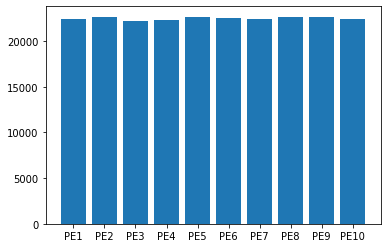

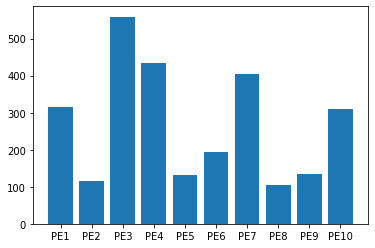

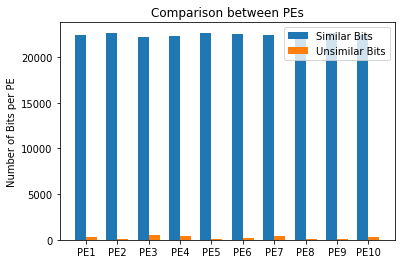

In [132]:
visualization(similar_bits, unsimilar_bits)

In [133]:
#comparison between malicious before and adverserial data
similar_bits2 , unsimilar_bits2 = compute_similarity(malicious_df, adverserial_df)

In [134]:
print ("Malicious Vs Adverserial")
print (similar_bits2)
print (unsimilar_bits2)

Malicious Vs Adverserial
[13905, 16742, 20437, 21799, 22617, 22551, 22538, 22588, 22607, 22584]
[8856, 6019, 2324, 962, 144, 210, 223, 173, 154, 177]


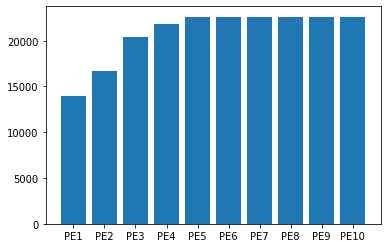

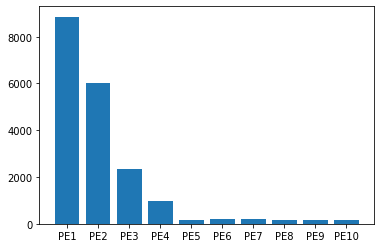

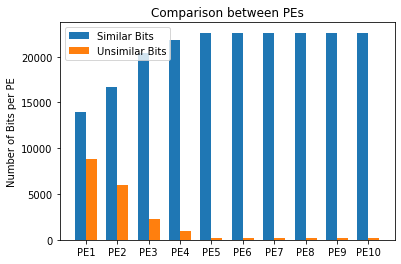

In [135]:
visualization(similar_bits2, unsimilar_bits2)

In [136]:
#dataframes for the data after 50 epochs events
benign_dfepochs = create_dataframe('benign_epochs')
malicious_dfepochs = create_dataframe('malicious-before_epochs')
adverserial_dfepochs = create_dataframe('adverserial_epochs')

In [137]:
print(benign_dfepochs)

  0     1     2     3     4     5     6     7     8     9      ... 22751  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
3   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
6   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
7   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
8   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
9   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   

  22752 22753 22754 22755 22756 22757 22758 22759 22760  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0

In [138]:
print(malicious_dfepochs)

  0     1     2     3     4     5     6     7     8     9      ... 22751  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
1   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
4   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0  ...   0.0   
5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
6   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
7   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
8   0.0   0.0   1.0   1.0   1.0   0.0   1.0   0.0   0.0   0.0  ...   0.0   
9   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   

  22752 22753 22754 22755 22756 22757 22758 22759 22760  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0

In [139]:
print(adverserial_dfepochs)

  0     1     2     3     4     5     6     7     8     9      ... 22751  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
1   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
4   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0  ...   0.0   
5   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
6   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
7   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
8   0.0   0.0   1.0   1.0   1.0   0.0   1.0   0.0   0.0   0.0  ...   0.0   
9   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   

  22752 22753 22754 22755 22756 22757 22758 22759 22760  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0

In [148]:
#cosine similarity comparison between malicious before and adverserial data
similar_counts, unsimilar_counts = calculate_cosine_similarity(malicious_dfepochs, adverserial_dfepochs)

In [140]:
#comparison 3 between benign and adverserial data after executing 50 epochs
similar_bits3,unsimilar_bits3 = compute_similarity (benign_dfepochs, adverserial_dfepochs)

In [141]:
print ("Benign Vs Adverserial after epochs")
print (similar_bits3)
print (unsimilar_bits3)

Benign Vs Adverserial after epochs
[22729, 22595, 22396, 22322, 22659, 22651, 22604, 22643, 21951, 22644]
[32, 166, 365, 439, 102, 110, 157, 118, 810, 117]


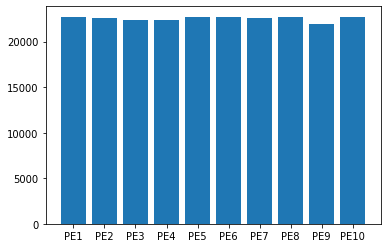

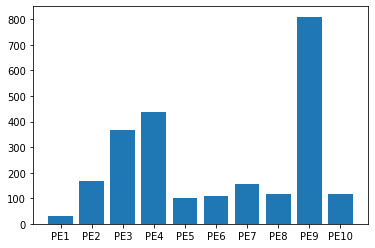

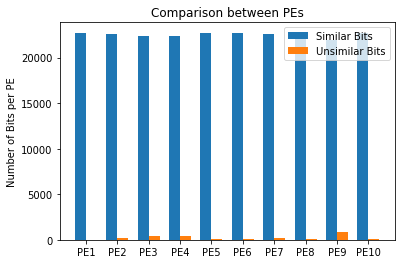

In [142]:
visualization(similar_bits3, unsimilar_bits3)

In [143]:
#comparison 4 between malicious before and adverserial data after executing 50 epochs
similar_bits4,unsimilar_bits4 = compute_similarity (malicious_dfepochs, adverserial_dfepochs)

In [144]:
print ("Malicious Vs Adverserial after epochs")
print (similar_bits4)
print (unsimilar_bits4)

Malicious Vs Adverserial after epochs
[22761, 22761, 22741, 22761, 22761, 22723, 22761, 22761, 22761, 22744]
[0, 0, 20, 0, 0, 38, 0, 0, 0, 17]


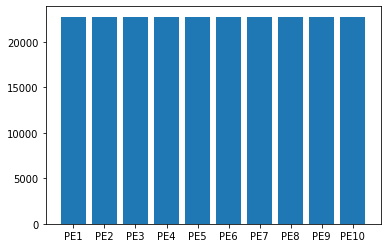

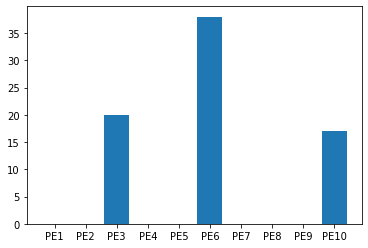

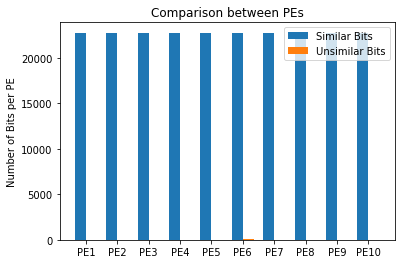

In [145]:
visualization(similar_bits4, unsimilar_bits4)